## **SCORING - Dipeptidyl Peptidase IV**
#### **Micha Birklbauer 2021-10-08**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/PIAScore.py", "PIAScore.py")

'PIAScore.py'

In [2]:
import pandas as pd
from PIAScore import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Pi-Cation_Interaction:HIS740A,Halogen_Bond:ASP709A,Halogen_Bond:VAL546A,Hydrogen_Bond:GLY741A,Water_Bridge:GLU204A,Water_Bridge:ARG125A,Halogen_Bond:ARG358A,Hydrophobic_Interaction:ALA743A,...,Hydrogen_Bond:ARG669A,Hydrogen_Bond:ASN710A,Hydrogen_Bond:GLU204A,Hydrophobic_Interaction:ARG125A,Halogen_Bond:SER630A,Water_Bridge:ASP739A,Salt_Bridge:ARG358A,Water_Bridge:GLU205A,Hydrophobic_Interaction:ASP739A,LABEL
0,1,CHEMBL386369|actives_final|sdf|444,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,active
1,2,ZINC38935877|decoys_final|sdf|121,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,inactive
2,3,ZINC63159848|decoys_final|sdf|138,0,0,0,0,0,3,0,0,...,0,1,0,0,0,0,0,0,0,inactive
3,4,ZINC23079060|decoys_final|sdf|264,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,inactive
4,5,CHEMBL290337|actives_final|sdf|331,0,0,0,0,0,3,0,0,...,1,1,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1287,ZINC42735078|decoys_final|sdf|623,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,inactive
1287,1288,ZINC42118011|decoys_final|sdf|838,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1288,1289,ZINC00124341|decoys_final|sdf|878,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1289,1290,CHEMBL558956|actives_final|sdf|565,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,active


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(1291, 123) 654


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(323, 123) 179


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(404, 123) 210


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:GLU205A,0.355496,1.267584,0.912088
1,2,Pi-Stacking:TYR666A,0.128570,0.229358,0.357928
2,3,Hydrogen_Bond:ASN710A,0.124799,0.735474,0.610675
3,4,Hydrogen_Bond:GLU206A,0.123808,0.360856,0.237049
4,5,Water_Bridge:ARG358A,0.121671,0.146789,0.025118
...,...,...,...,...,...
115,116,Pi-Cation_Interaction:ARG358A,0.001488,0.003058,0.001570
116,117,Halogen_Bond:ARG125A,0.001366,0.007645,0.006279
117,118,Halogen_Bond:HIS740A,0.000163,0.006116,0.006279
118,119,Hydrogen_Bond:GLY741A,0.000041,0.001529,0.001570


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat4 Accuracy: 0.7141750580945004
Key: 0.0, 0.0, 0.0: strat3 Accuracy: 0.6924864446165763
Key: 0.05, 0.0, 0.0: strat4 Accuracy: 0.6808675445391169
Key: 0.05, 0.0, 0.05: strat3 Accuracy: 0.6808675445391169
Key: 0.05, 0.05, 0.0: strat4 Accuracy: 0.6808675445391169


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.7718375988362882
Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.7677557261436686
Key: 0.05, 0.0, 0.0: strat4 Area under the ROC curve: 0.7465998396535748
Key: 0.05, 0.05, 0.0: strat4 Area under the ROC curve: 0.7465998396535748
Key: 0.05, 0.0, 0.0: strat3 Area under the ROC curve: 0.7446075113178652


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.05: strat3 Accuracy: 0.7089783281733746
Key: 0.0, 0.0, 0.05: strat4 Accuracy: 0.7058823529411765
Key: 0.0, 0.05, 0.0: strat3 Accuracy: 0.6996904024767802
Key: 0.0, 0.05, 0.05: strat4 Accuracy: 0.6996904024767802
Key: 0.0, 0.1, 0.0: strat3 Accuracy: 0.6996904024767802


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.7504073556797021
Key: 0.05, 0.0, 0.0: strat3 Area under the ROC curve: 0.7503297641216636
Key: 0.05, 0.05, 0.0: strat3 Area under the ROC curve: 0.7503297641216636
Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.750310366232154
Key: 0.05, 0.0, 0.05: strat3 Area under the ROC curve: 0.7463919925512104


In [16]:
features_filtered = get_relevant_features(features, 0.0, 0.0, 0.05)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:GLU205A,0.355496,1.267584,0.912088
1,2,Pi-Stacking:TYR666A,0.128570,0.229358,0.357928
2,3,Hydrogen_Bond:ASN710A,0.124799,0.735474,0.610675
3,4,Hydrogen_Bond:GLU206A,0.123808,0.360856,0.237049
5,6,Hydrogen_Bond:ARG125A,0.119393,0.879205,0.759812
6,7,Hydrogen_Bond:TYR547A,0.111450,0.529052,0.640502
7,8,Hydrophobic_Interaction:VAL711A,0.096078,0.458716,0.362637
8,9,Hydrophobic_Interaction:TRP659A,0.093848,0.163609,0.257457
10,11,Hydrophobic_Interaction:PHE357A,0.092996,0.633028,0.540031
11,12,Hydrogen_Bond:HIS740A,0.089271,0.360856,0.271586


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Hydrogen_Bond:GLU205A',
 'Hydrogen_Bond:ASN710A',
 'Hydrogen_Bond:GLU206A',
 'Hydrogen_Bond:ARG125A',
 'Hydrophobic_Interaction:VAL711A',
 'Hydrophobic_Interaction:PHE357A',
 'Hydrogen_Bond:HIS740A',
 'Hydrogen_Bond:SER630A',
 'Water_Bridge:SER209A',
 'Hydrogen_Bond:SER209A',
 'Hydrophobic_Interaction:TRP629A',
 'Hydrophobic_Interaction:ARG358A',
 'Hydrophobic_Interaction:TYR631A',
 'Pi-Stacking:PHE357A',
 'Water_Bridge:ARG125A',
 'Hydrophobic_Interaction:VAL656A',
 'Hydrogen_Bond:ARG669A',
 'Hydrogen_Bond:TYR662A',
 'Hydrophobic_Interaction:GLU205A']

In [20]:
negatives

['Pi-Stacking:TYR666A',
 'Hydrogen_Bond:TYR547A',
 'Hydrophobic_Interaction:TRP659A',
 'Salt_Bridge:GLU206A',
 'Pi-Cation_Interaction:ARG125A',
 'Water_Bridge:SER630A',
 'Hydrophobic_Interaction:TYR547A',
 'Salt_Bridge:GLU205A',
 'Water_Bridge:HIS740A',
 'Hydrophobic_Interaction:TYR666A',
 'Water_Bridge:ARG669A',
 'Hydrophobic_Interaction:TYR662A',
 'Pi-Stacking:TYR662A',
 'Water_Bridge:ASN710A',
 'Hydrogen_Bond:TYR631A']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [6, 0.6483346243222309] 
Strategy 2:  [7, 0.6421378776142526] 
Strategy 3:  [3, 0.6622773044151821] 
Strategy 4:  [4, 0.6700232378001549]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 6, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 7, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 3, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 4, "accuracy")
)

Strategy 1:  0.6483346243222309 
Strategy 2:  0.6421378776142526 
Strategy 3:  0.6622773044151821 
Strategy 4:  0.6700232378001549


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 6, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 7, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 3, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 4, "fpr")
)

Strategy 1:  0.5086342229199372 
Strategy 2:  0.46781789638932497 
Strategy 3:  0.3579277864992151 
Strategy 4:  0.2778649921507064


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 6, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 7, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, 4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6483346243222309, 'FPR': 0.5086342229199372, 'AUC': 0.6834682355652212, 'Ya': 0.6179245283018868, 'EF': 1.2197867982228376, 'REF': 80.1223241590214} 
Strategy 2:  {'ACC': 0.6421378776142526, 'FPR': 0.46781789638932497, 'AUC': 0.6785282214508951, 'Ya': 0.6218274111675127, 'EF': 1.2274911128704264, 'REF': 74.92354740061162} 
Strategy 3:  {'ACC': 0.6622773044151821, 'FPR': 0.3579277864992151, 'AUC': 0.7242689595245296, 'Ya': 0.6617210682492581, 'EF': 1.3062414359476946, 'REF': 68.19571865443424} 
Strategy 4:  {'ACC': 0.6700232378001549, 'FPR': 0.2778649921507064, 'AUC': 0.7273186621155167, 'Ya': 0.6958762886597938, 'EF': 1.3736640499385226, 'REF': 69.58762886597938}


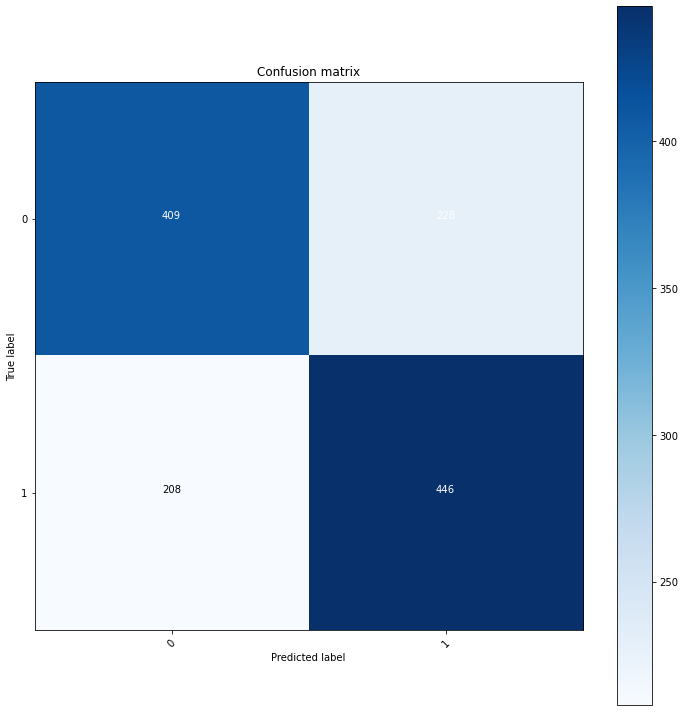

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat3, 3)["CM"], classes = [0, 1], filename = "results/CM_train_strat3.png");

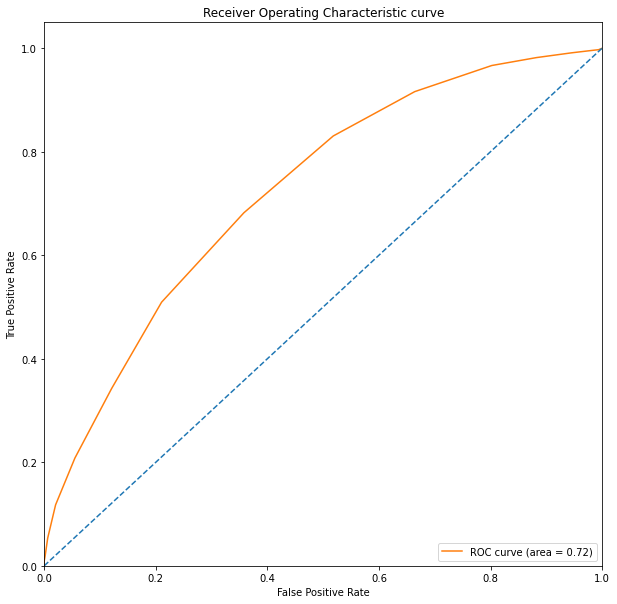

In [29]:
roc = get_metrics(train_result_strat3, 3)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat3.png");

*validation data:*

In [30]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 6, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 7, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, 4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6780185758513931, 'FPR': 0.5, 'AUC': 0.6996818746120421, 'Ya': 0.6712328767123288, 'EF': 1.2112191015535319, 'REF': 82.12290502793296} 
Strategy 2:  {'ACC': 0.6687306501547987, 'FPR': 0.4583333333333333, 'AUC': 0.6984404096834265, 'Ya': 0.6764705882352942, 'EF': 1.2206703910614527, 'REF': 77.09497206703911} 
Strategy 3:  {'ACC': 0.7089783281733746, 'FPR': 0.2916666666666667, 'AUC': 0.7385552451893235, 'Ya': 0.7514792899408284, 'EF': 1.3560212885524445, 'REF': 75.14792899408285} 
Strategy 4:  {'ACC': 0.7058823529411765, 'FPR': 0.24305555555555555, 'AUC': 0.7394669459962756, 'Ya': 0.7727272727272727, 'EF': 1.394362620619604, 'REF': 77.27272727272727}


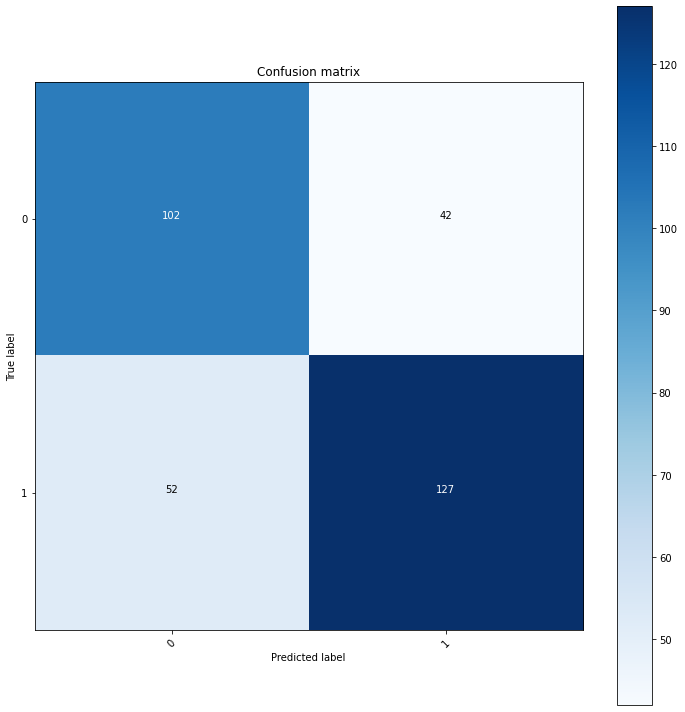

In [31]:
plot_confusion_matrix(get_metrics(val_result_strat3, 3)["CM"], classes = [0, 1], filename = "results/CM_val_strat3.png");

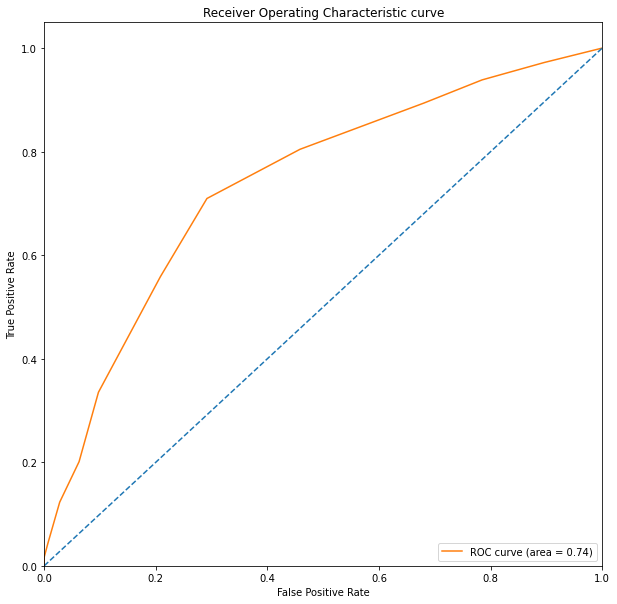

In [32]:
roc = get_metrics(val_result_strat3, 3)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat3.png");

*test data:*

In [33]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 6, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 7, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, 3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, 4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6262376237623762, 'FPR': 0.5154639175257731, 'AUC': 0.6525650466372116, 'Ya': 0.6138996138996139, 'EF': 1.1810259238830667, 'REF': 75.71428571428571} 
Strategy 2:  {'ACC': 0.6138613861386139, 'FPR': 0.4536082474226804, 'AUC': 0.6439003436426116, 'Ya': 0.6173913043478261, 'EF': 1.1877432712215321, 'REF': 67.61904761904762} 
Strategy 3:  {'ACC': 0.650990099009901, 'FPR': 0.32989690721649484, 'AUC': 0.6852724594992636, 'Ya': 0.6751269035532995, 'EF': 1.2988155668358714, 'REF': 67.51269035532995} 
Strategy 4:  {'ACC': 0.6361386138613861, 'FPR': 0.26288659793814434, 'AUC': 0.6904761904761905, 'Ya': 0.6909090909090909, 'EF': 1.3291774891774892, 'REF': 69.0909090909091}


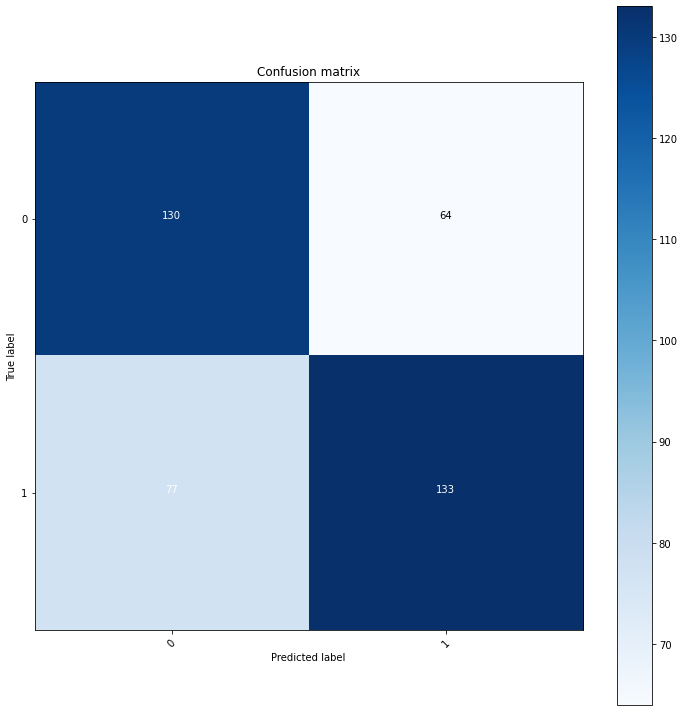

In [34]:
plot_confusion_matrix(get_metrics(test_result_strat3, 3)["CM"], classes = [0, 1], filename = "results/CM_test_strat3.png");

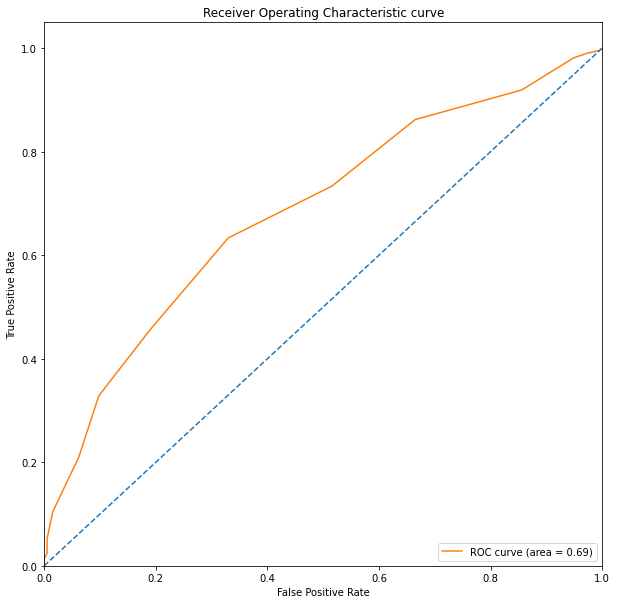

In [35]:
roc = get_metrics(test_result_strat3, 3)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat3.png");

#### **Clean up:**

In [36]:
os.remove("PIAScore.py")